In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


df = pd.read_csv('group_3-2.csv')

print("Data Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nClass Distribution:\n", df['diagnosis'].value_counts())

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

Data Shape: (1620, 16)

Missing Values:
 age                              0
gender                           0
sleep_quality_index             25
brain_fog_level                 26
physical_pain_score             26
stress_level                    22
depression_phq9_score           24
fatigue_severity_scale_score    24
pem_duration_hours              24
hours_of_sleep_per_night        25
pem_present                     27
work_status                     27
social_activity_level           26
exercise_frequency              26
meditation_or_mindfulness       24
diagnosis                        0
dtype: int64

Class Distribution:
 diagnosis
ME/CFS        648
Depression    567
Both          405
Name: count, dtype: int64


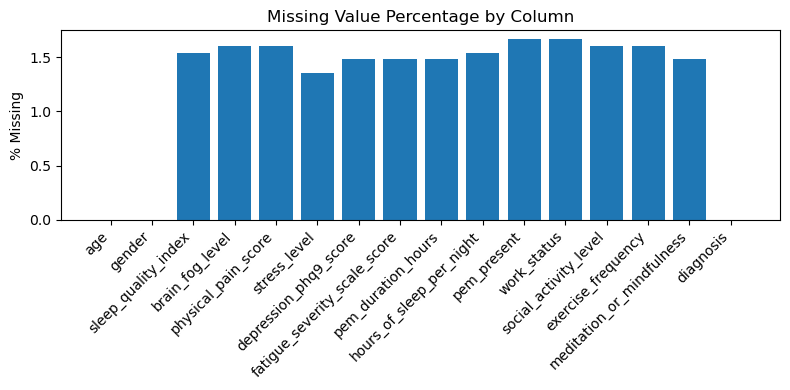

In [2]:
import matplotlib.pyplot as plt

def plot_missingness_bar(df):

    missing = df.isnull().mean() * 100 

    plt.figure(figsize=(8, 4))
    plt.bar(missing.index, missing.values)
    plt.xticks(rotation=45, ha="right")
    plt.title("Missing Value Percentage by Column")
    plt.ylabel("% Missing")
    plt.tight_layout()
    plt.show()

plot_missingness_bar(df)

In [5]:
print('Shape before dropping missing values:', df.shape)
df_cleaned = df.dropna()  # or use df.fillna(...)
print('Shape after dropping missing values:', df_cleaned.shape)
df_cleaned.to_csv('cleaned_data.csv', index=False)

Shape before dropping missing values: (1322, 16)
Shape after dropping missing values: (1322, 16)


In [6]:
X = df.drop('diagnosis', axis=1) 
y = df['diagnosis'] 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"\nTraining Set: {X_train.shape}, Test Set: {X_test.shape}")
train_cleaned = pd.concat([X_train, y_train], axis=1)
test_cleaned = pd.concat([X_test, y_test], axis=1)

# 4. 保存清理后的数据到 CSV 文件
train_cleaned.to_csv('train_cleaned.csv', index=False)
test_cleaned.to_csv('test_cleaned.csv', index=False)

print("训练集和测试集已保存为 'train_cleaned.csv' 和 'test_cleaned.csv'")


Training Set: (925, 15), Test Set: (397, 15)
训练集和测试集已保存为 'train_cleaned.csv' 和 'test_cleaned.csv'


In [8]:
import os

# 确保文件夹存在
os.makedirs('Group_3', exist_ok=True)

# 保存文件
train_cleaned.to_csv('Group_3/train_cleaned.csv', index=False)
test_cleaned.to_csv('Group_3/test_cleaned.csv', index=False)
df_cleaned.to_csv('Group_3/df_cleaned.csv', index=False)

In [6]:
from sklearn.metrics import confusion_matrix
import numpy as np

label_mapping = {"ME/CFS": 0, "Depression": 1, "Both": 2}
y_train_enc = y_train.map(label_mapping)
y_test_enc  = y_test.map(label_mapping)

labels_order = [0, 1, 2]   

# rows = true class, cols = predicted class
cost_matrix = np.array([
    [0, 5, 3],  
    [2, 0, 2], 
    [3, 4, 0],  
])

def average_cost(y_true, y_pred, cost_matrix=cost_matrix, labels=labels_order):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    total_cost = np.sum(cm * cost_matrix)
    return total_cost / np.sum(cm)

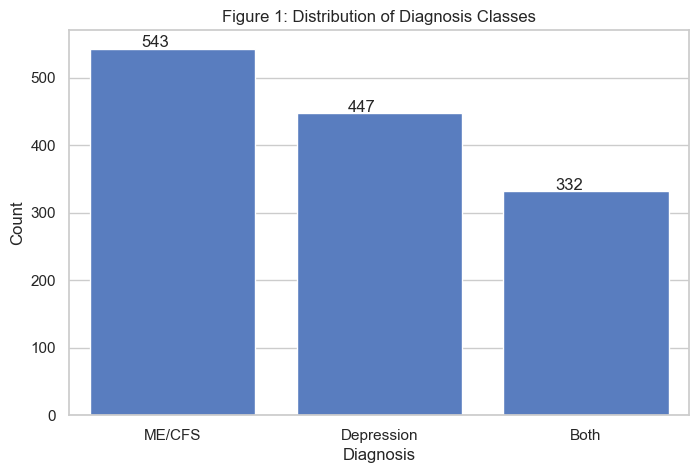

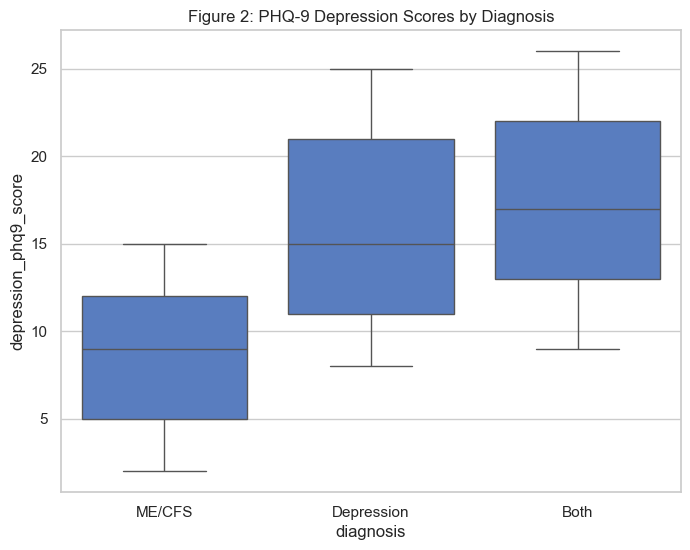

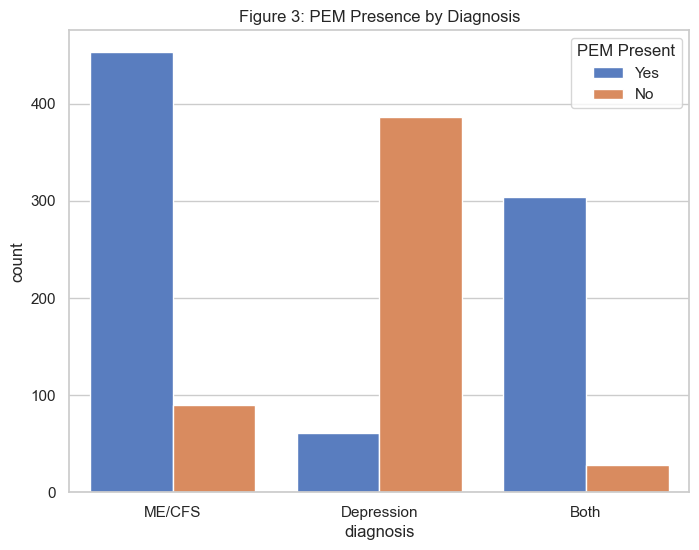

In [7]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='diagnosis', data=df, order=['ME/CFS', 'Depression', 'Both'])
plt.title('Figure 1: Distribution of Diagnosis Classes')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + 0.25, p.get_height() + 2))
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='diagnosis', y='depression_phq9_score', data=df, order=['ME/CFS', 'Depression', 'Both'])
plt.title('Figure 2: PHQ-9 Depression Scores by Diagnosis')
plt.show()

plt.figure(figsize=(8, 6))
temp_df = df.copy()
temp_df['pem_present'] = temp_df['pem_present'].map({1.0: 'Yes', 0.0: 'No'})
sns.countplot(x='diagnosis', hue='pem_present', data=temp_df, order=['ME/CFS', 'Depression', 'Both'])
plt.title('Figure 3: PEM Presence by Diagnosis')
plt.legend(title='PEM Present')
plt.show()

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

models = {
    "Baseline": DummyClassifier(strategy='most_frequent'),
    "Logistic Regression": LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "SVM": SVC(probability=True, kernel='rbf', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

print("Models and Pipelines defined successfully.")

Models and Pipelines defined successfully.


--- 5-Fold Cross-Validation Results (Macro F1) ---
Baseline            : Mean Macro F1 = 0.194 (+/- 0.000)
Logistic Regression : Mean Macro F1 = 0.787 (+/- 0.038)
Decision Tree       : Mean Macro F1 = 0.822 (+/- 0.029)


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

Random Forest       : Mean Macro F1 = 0.812 (+/- 0.024)
SVM                 : Mean Macro F1 = 0.767 (+/- 0.036)
KNN                 : Mean Macro F1 = 0.712 (+/- 0.022)

--- Final Test Set Evaluation: Decision Tree ---
Classification report (test set):
              precision    recall  f1-score   support

      ME/CFS       0.88      0.45      0.60       100
  Depression       0.80      0.91      0.85       134
        Both       0.74      0.88      0.80       163

    accuracy                           0.78       397
   macro avg       0.81      0.75      0.75       397
weighted avg       0.80      0.78      0.77       397

Average cost (test set): 0.746


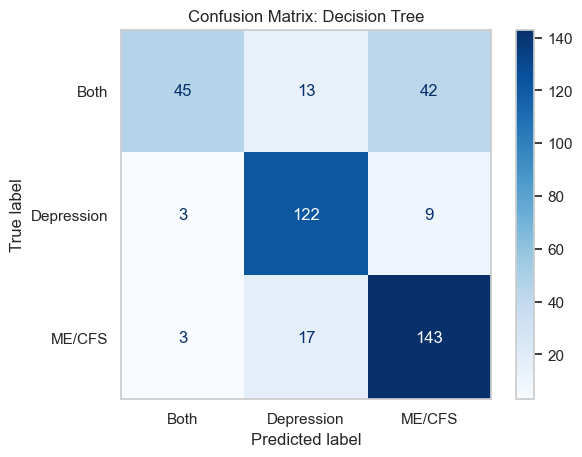

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import pandas as pd

print("--- 5-Fold Cross-Validation Results (Macro F1) ---")
cv_results = {}
for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')
    cv_results[name] = cv_scores.mean()
    print(f"{name:20s}: Mean Macro F1 = {cv_scores.mean():.3f} (+/- {cv_scores.std():.3f})")

best_model_name = max(cv_results, key=cv_results.get)
print(f"\n--- Final Test Set Evaluation: {best_model_name} ---")

final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('classifier', models[best_model_name])
])
final_pipeline.fit(X_train, y_train)

y_pred = final_pipeline.predict(X_test)

print("Classification report (test set):")
print(classification_report(y_test, y_pred, target_names=["ME/CFS", "Depression", "Both"]))

y_test_enc = y_test.map(label_mapping)
y_pred_enc = pd.Series(y_pred).map(label_mapping)

avg_cost = average_cost(y_test_enc, y_pred_enc)
print(f"Average cost (test set): {avg_cost:.3f}")

cm = confusion_matrix(y_test, y_pred, labels=final_pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix: {best_model_name}')
plt.grid(False)
plt.show()

In [10]:
from sklearn.pipeline import Pipeline

trained_models = {}

for name, model in models.items():
    if name == "Baseline":
        continue 
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', model)])
    clf.fit(X_train, y_train)
    trained_models[name] = clf

print("All 5 models trained and saved!")

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


All 5 models trained and saved!


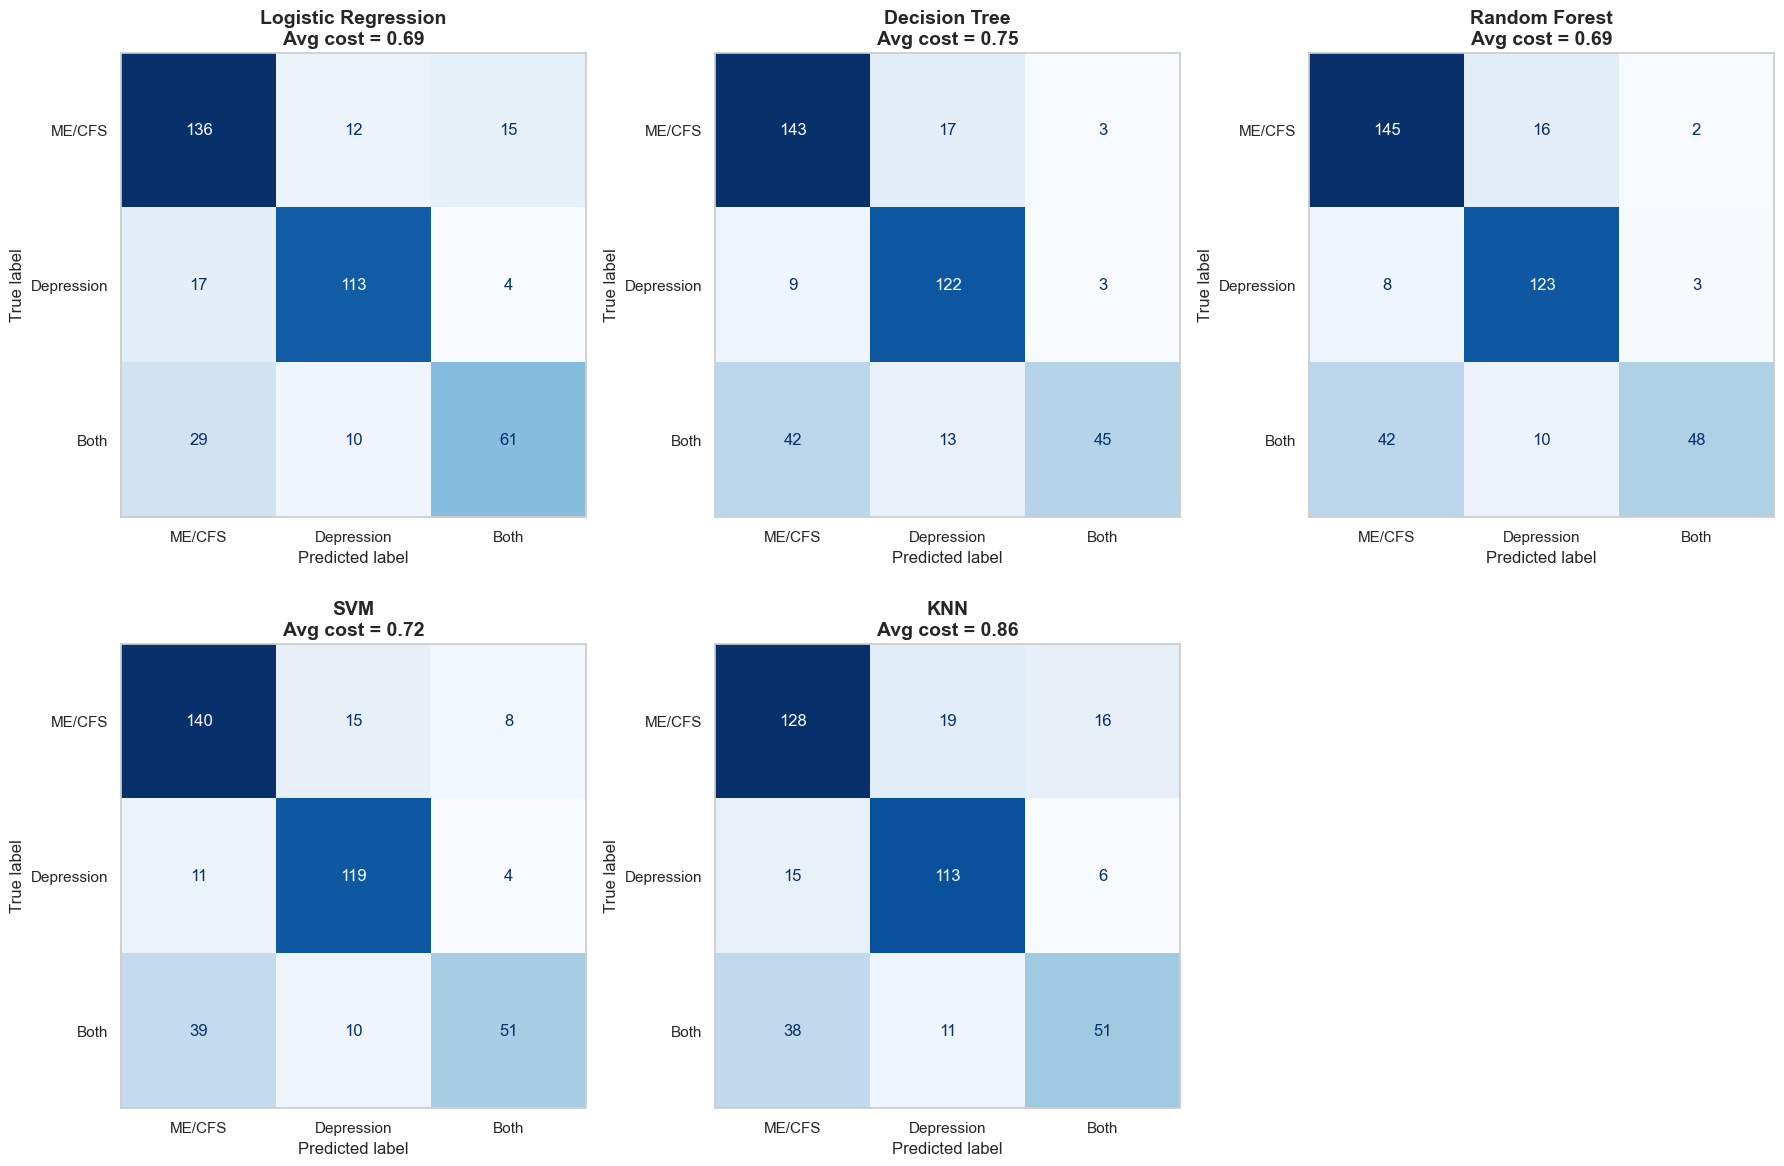

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cms = {}
avg_costs = {}

class_names = ['ME/CFS', 'Depression', 'Both']  
labels_order = [0, 1, 2]                        

for name, clf in trained_models.items():
    y_pred = clf.predict(X_test)         
    cm = confusion_matrix(y_test, y_pred, labels=class_names)
    cms[name] = cm
    y_test_enc = y_test.map(label_mapping)
    y_pred_enc = pd.Series(y_pred).map(label_mapping)
    avg_costs[name] = average_cost(y_test_enc, y_pred_enc)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (name, cm) in enumerate(cms.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=class_names)
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False, values_format='d')
    axes[i].set_title(f"{name}\nAvg cost = {avg_costs[name]:.2f}",
                      fontsize=14, fontweight='bold')
    axes[i].grid(False)

axes[5].axis('off')

plt.tight_layout()
plt.show()


Detected classes order: ['Both' 'Depression' 'ME/CFS']


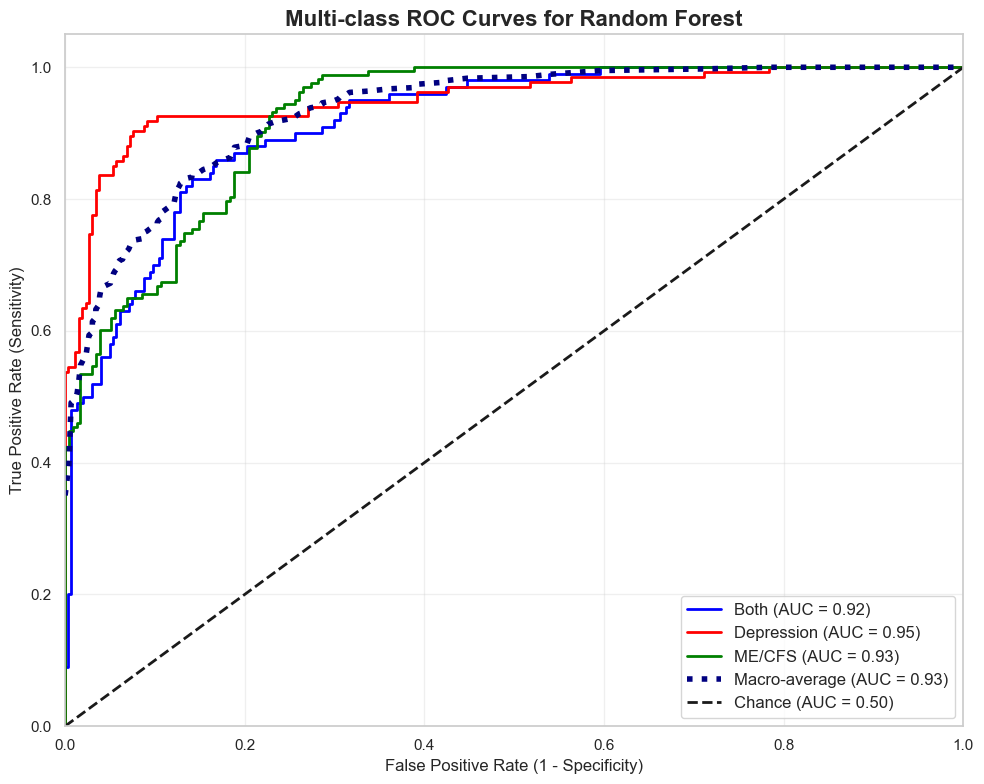

In [12]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

winning_model_name = "Random Forest"
winning_model = trained_models[winning_model_name]

target_classes = winning_model.classes_
print(f"Detected classes order: {target_classes}")

y_test_bin = label_binarize(y_test, classes=target_classes)
n_classes = y_test_bin.shape[1]

y_score = winning_model.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green']) 

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{target_classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot(fpr["macro"], tpr["macro"],
         label=f'Macro-average (AUC = {roc_auc["macro"]:.2f})',
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance (AUC = 0.50)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title(f'Multi-class ROC Curves for {winning_model_name}', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

/var/folders/gm/4t8j527n4zl7zd9x_20bk6b00000gn/T/ipykernel_68438/2579992340.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


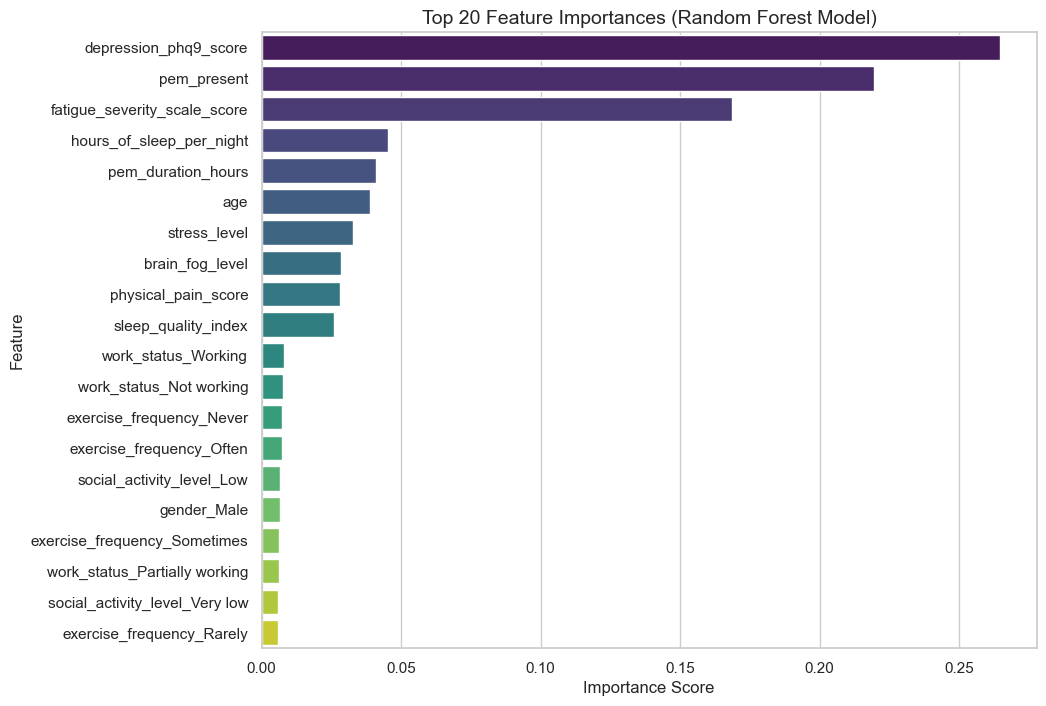

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rf_pipeline = trained_models['Random Forest'] 

rf_model = rf_pipeline.named_steps['classifier']
fitted_preprocessor = rf_pipeline.named_steps['preprocessor']

importances = rf_model.feature_importances_

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
ohe_feature_names = fitted_preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_features)
all_feature_names = list(numeric_features) + list(ohe_feature_names)

feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importance_df.head(20), 
    palette='viridis' 
)
plt.title('Top 20 Feature Importances (Random Forest Model)', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [14]:
from sklearn.pipeline import Pipeline

winning_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', models['Random Forest'])  
])

print("Training Random Forest model...")
winning_model_pipeline.fit(X_train, y_train)
print("Training complete.")


import pandas as pd
from sklearn.metrics import classification_report

y_pred_best = winning_model_pipeline.predict(X_test)

report_dict = classification_report(y_test, y_pred_best, output_dict=True)

df_report = pd.DataFrame(report_dict).transpose()

target_rows = ['Both', 'Depression', 'ME/CFS', 'macro avg']
df_report_filtered = df_report.loc[target_rows]

df_report_filtered.columns = ['Precision', 'Recall', 'F1-Score', 'Support']

y_test_enc_best = y_test.map(label_mapping)
y_pred_best_enc = pd.Series(y_pred_best).map(label_mapping)
avg_cost_best = average_cost(y_test_enc_best, y_pred_best_enc)

print("\n=======================================================")
print(f"   获胜模型详细性能表 (Winning Model: Random Forest)")
print("=======================================================")
display(df_report_filtered.style.format({
    'Precision': '{:.2%}',
    'Recall': '{:.2%}',
    'F1-Score': '{:.2%}',
    'Support': '{:.0f}'
}))

print(f"\nAverage cost (Random Forest): {avg_cost_best:.3f}")

recall_data = []


y_test_enc_all = y_test.map(label_mapping)

for name, model in models.items():
    # 创建临时管道并训练
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipe.fit(X_train, y_train)
    y_p = pipe.predict(X_test)
    
    # 获取报告
    rep = classification_report(y_test, y_p, output_dict=True)
    
    # ★ 计算该模型的 avg cost
    y_p_enc = pd.Series(y_p).map(label_mapping)
    avg_cost_model = average_cost(y_test_enc_all, y_p_enc)
    
    recall_data.append({
        'Model': name,
        'Recall (ME/CFS)': rep['ME/CFS']['recall'],
        'Recall (Both)': rep['Both']['recall'],
        'Recall (Depression)': rep['Depression']['recall'],
        'Macro F1': rep['macro avg']['f1-score'],
        'Avg cost': avg_cost_model          # ★ 新增列
    })

df_recall_comparison = pd.DataFrame(recall_data).set_index('Model')

print("\n\n=======================================================")
print("          各模型关键指标对比 (Model Comparison)")
print("=======================================================")
display(
    df_recall_comparison
    .style.format({
        'Recall (ME/CFS)': '{:.2%}',
        'Recall (Both)': '{:.2%}',
        'Recall (Depression)': '{:.2%}',
        'Macro F1': '{:.2%}',
        'Avg cost': '{:.3f}'
    })
    .highlight_max(subset=['Recall (ME/CFS)', 'Macro F1'], axis=0, color='lightgreen')
    .highlight_min(subset=['Avg cost'], axis=0, color='lightblue')
)


Training Random Forest model...
Training complete.

   获胜模型详细性能表 (Winning Model: Random Forest)


,Precision,Recall,F1-Score,Support
Both,90.57%,48.00%,62.75%,100
Depression,82.55%,91.79%,86.93%,134
ME/CFS,74.36%,88.96%,81.01%,163
macro avg,82.49%,76.25%,76.89%,397



Average cost (Random Forest): 0.690


/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-pa



          各模型关键指标对比 (Model Comparison)


,Recall (ME/CFS),Recall (Both),Recall (Depression),Macro F1,Avg cost
Model,,,,,
Baseline,100.00%,0.00%,0.00%,19.40%,1.431
Logistic Regression,83.44%,61.00%,84.33%,76.88%,0.690
Decision Tree,87.73%,45.00%,91.04%,75.01%,0.746
Random Forest,88.96%,48.00%,91.79%,76.89%,0.690
SVM,85.89%,51.00%,88.81%,75.84%,0.720
KNN,78.53%,51.00%,84.33%,71.66%,0.864


In [20]:
import os
from joblib import dump  # pip install joblib 如果本环境没有的话

# 创建保存模型的文件夹
os.makedirs("Group_3/models", exist_ok=True)

for name, clf in trained_models.items():
    # 把模型名变成比较干净的文件名，如 "Random Forest" -> "random_forest.joblib"
    filename = name.lower().replace(" ", "_") + ".joblib"
    filepath = os.path.join("Group_3/models", filename)
    
    dump(clf, filepath)
    print(f"Saved {name} pipeline to {filepath}")

Saved Logistic Regression pipeline to Group_3/models/logistic_regression.joblib
Saved Decision Tree pipeline to Group_3/models/decision_tree.joblib
Saved Random Forest pipeline to Group_3/models/random_forest.joblib
Saved SVM pipeline to Group_3/models/svm.joblib
Saved KNN pipeline to Group_3/models/knn.joblib


In [22]:
import platform
import sys
import pandas as pd
import numpy as np

# 获取当前环境信息
env_info = {
    'Python Version': sys.version,
    'Platform': platform.system(),
    'Platform Version': platform.version(),
    'Platform Release': platform.release(),
    'Machine Type': platform.machine(),
    'Processor': platform.processor(),
    'Pandas Version': pd.__version__,
    'Numpy Version': np.__version__
}

# 创建文件并写入环境信息
with open('Group_3/environment_info.txt', 'w') as f:
    for key, value in env_info.items():
        f.write(f"{key}: {value}\n")

print("环境信息已保存到 'Group_3/environment_info.txt' 文件中。")


环境信息已保存到 'Group_3/environment_info.txt' 文件中。
